In [1]:
from PIL import Image 
image_file = Image.open("recipt.png") # open colour image
image_file = image_file.convert('1') # convert image to black and white
image_file.save('result.png')
import numpy as np

In [29]:
image = Image.open('result.png')
image

image = np.array(image)

## 이미지 컨투어

컨투어란 동일한 색 또는 동일한 픽셀값을 가지고 있는 영역의 경계선 정보다. 물체의 윤곽선, 외형을 파악하는데 사용된다.

OpenCV의 findContours 함수로 이미지의 컨투어 정보, 컨투어의 상하구조 정보를 출력한다. 흑백이미지 또는 이진화된 이미지만 적용할 수 있다.

In [30]:
import cv2
from skimage.data import horse

img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw

img = img_raw.copy().astype('uint8')

contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

컨투어 정보는 컨투어를 구성하는 점들로 이루어진 배열의 리스트이다. 리스트의 원소의 갯수는 컨투어의 갯수와 같다

In [31]:
len(contours)

2

In [32]:
contours[0].shape

(312, 1, 2)

In [33]:
np.squeeze(contours[0])[:5]

array([[350,   9],
       [346,  13],
       [345,  13],
       [339,  19],
       [330,  20]], dtype=int32)

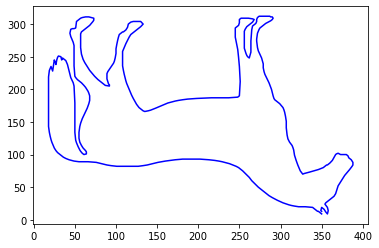

In [34]:
import matplotlib.pyplot as plt
x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c="b")
plt.show()

### 컨투어 특징

#### 이미지 모멘트

이미지 모멘트는 컨투어에 관한 특징값을 뜻한다. OpenCV에서는 moment 함수로 이미지 모멘트를 구한다. 컨투어 포인트 배열을 입력하면 해당 컨투어의 모멘트를 딕셔너리 타입으로 반환한다.

In [35]:
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 42355.0,
 'm10': 7943000.166666666,
 'm01': 6115675.833333333,
 'm20': 1914995009.1666665,
 'm11': 1043128904.8333333,
 'm02': 1041817606.0,
 'm30': 517465951777.85004,
 'm21': 233874687443.69998,
 'm12': 169430720481.3,
 'm03': 200904428563.85,
 'mu20': 425412866.6175771,
 'mu11': -103767899.87557864,
 'mu02': 158769774.61250484,
 'mu30': -1219318387.8395386,
 'mu21': -3713125246.697487,
 'mu12': 4020833974.2852783,
 'mu03': 4625649126.278534,
 'nu20': 0.2371380524771235,
 'nu11': -0.0578433790256196,
 'nu02': 0.08850309451896964,
 'nu30': -0.003302595676372647,
 'nu21': -0.010057218449154588,
 'nu12': 0.010890665663146169,
 'nu03': 0.012528843128440374}

In [36]:
cv2.contourArea(c0)

42355.0

In [37]:
cv2.arcLength(c0, closed=True), cv2.arcLength(c0, closed=False)

(2203.678272008896, 2199.678272008896)

In [38]:
x,y,w,h = cv2.boundingRect(c0)
x,y,w,h

(18, 9, 371, 304)

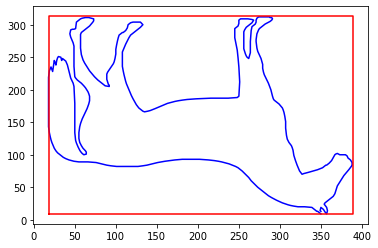

In [39]:
plt.plot(x0, y0, c='b')
plt.plot(
    [x, x+w, x+w, x, x],
    [y,y, y+h, y + h,y],
    c='r'
)
plt.show()

In [40]:
aspect_ratio = float(w) / h
aspect_ratio


1.2203947368421053

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49900 missing from c

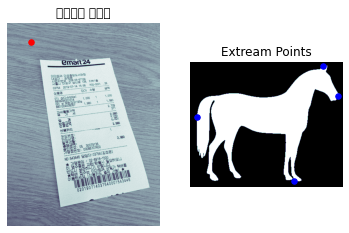

In [41]:

cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.subplot(1,2,1)
plt.imshow(image, cmap='bone')
plt.title("컨투어의 중심점")
plt.axis('off')
plt.scatter([cx], [cy], c="r", s=30)

plt.subplot(1,2,2)
plt.imshow(img_raw, cmap='bone')
plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="b", s=30)
plt.title("Extream Points")

plt.show()

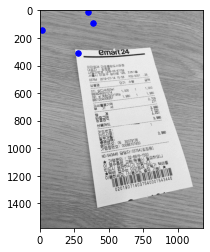

In [42]:

leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="b", s=30)
plt.imshow(image, cmap='gray')


In [48]:
_, contours, hierachy = cv2.findContours(img,cv2.RETR_FREE,cv2.CHAIN_APPROX_TC89_XCOS)
c0 = contours[0]
img = cv2.imread('./recipt.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, img_2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
img_2 = cv2.medianBlur(img_2,3)
img_result = cv2.morphologyEx(img_2,cv2.MORPH_CLOSE,
                           cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40,40))
                          )
plt.imshow(img_result, cmap='gray')
plt.axis('off')
plt.tight_layout()

AttributeError: module 'cv2.cv2' has no attribute 'RETR_FREE'

In [44]:
img_result

NameError: name 'img_result' is not defined

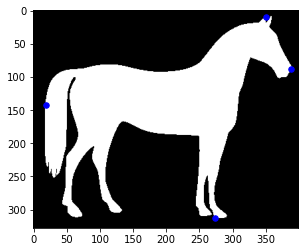

In [51]:
contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
c0 = contours[0]
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])
plt.imshow(img, cmap='gray')
plt.scatter([leftmost[0],rightmost[0],topmost[0],bottommost[0]],
            [leftmost[1],rightmost[1],topmost[1],bottommost[1]],
             c='b',s=30)
plt.show()

#### 컨투어 추정

컨투어 추정은 Douglas-Peucker 알고리즘을 이용해 컨투어 포인트의 수를 줄여 실제 컨투어 라인과 근사한 라인을 그릴 때 사용된다.
OpenCV에서는 approxPolyDP라는 함수로 구현되어 있다. 입력값으로는 컨투어 포인트 배열, 실제 컨투어 라인과 근사치의 최대거리, 폐곡선 여부가 있다. 다음 코드는 실제 컨투어 라인과 근사치의 최대거리를 0.01, 0.05로 설정하여 실제 컨투어 라인과 비교 한다.

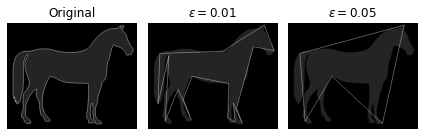

In [46]:
img1 = img_raw.copy().astype('uint8')
img2 = img_raw.copy().astype('uint8')
img3 = img_raw.copy().astype('uint8')

c0 = contours[0]

epsilon1 = 0.01*cv2.arcLength(c0, True)
epsilon2 = 0.05*cv2.arcLength(c0, True)

approx1 = cv2.approxPolyDP(c0, epsilon1, True)
approx2 = cv2.approxPolyDP(c0, epsilon2, True)

image1 = cv2.drawContours(img1, [c0], -1, 7)  #
image2 = cv2.drawContours(img2, [approx1], -1, 7)
image3 = cv2.drawContours(img3, [approx2], -1, 7)

titles = ['Original', '$\epsilon=0.01$', '$\epsilon=0.05$']
images = [image1, image2, image3]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Convex Hull

Convex Hull이란 컨투어 포인트를 먼저 포함하는 볼록한 외곽선을 의미한다. 결과는 컨투어 추정과 비슷하지만 방법이 다르다. 먼저, cv2.isContourConvex() 함수를 사용해 이미지의 컨투어가 볼록(convex)한지 확인 할 수 있다. 입력한 컨투어 배열이 볼록하다면 True 아니라면 False 값을 반환한다. 이때 볼록하다는 것은 컨투어 라인이 볼록하거나 평평한 선이라는 의미이다. 이전에 확인 했듯이 말 이미지의 컨투어 라인은 볼록한 선으로만 이루어져있지 않다. 따라서 다음 코드의 결과는 False를 반환한다

In [22]:
cv2.isContourConvex(c0)

False

컨투어 라인이 볼록하지 않다면 cv2.convexHull() 함수를 사용해 컨투어라인을 볼록하게 만들 수 있다.

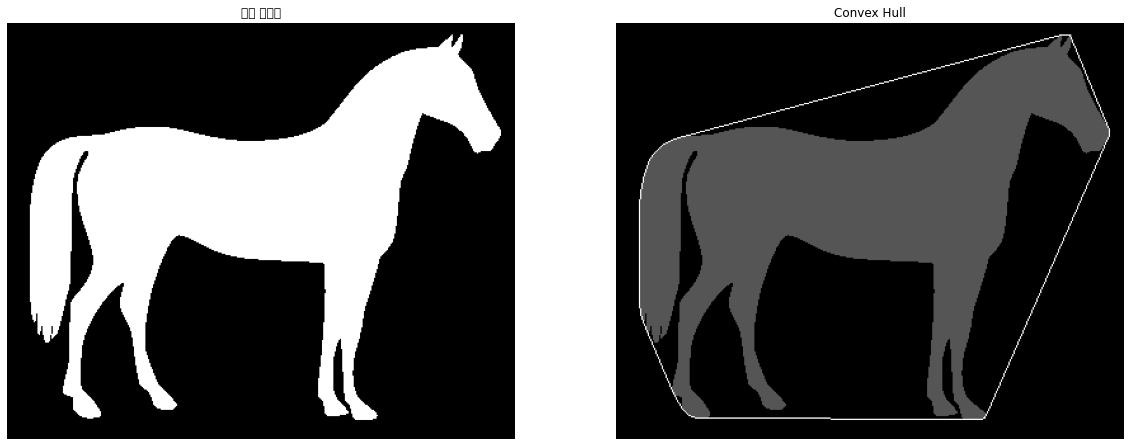

In [25]:
plt.figure(figsize=(20,20))
img4 = img_raw.copy().astype('uint8')

c0 = contours[0]
hull = cv2.convexHull(c0)
image4 = cv2.drawContours(img4, [hull], 0, 3)
titles = ['원본 이미지', 'Convex Hull']
images = [img_raw, img4]

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], 'gray')
    plt.axis('off')

plt.show()


### Bounding Rectangle

Boundimng Rectangle은 컨투어 라인을 둘러싸는 사각형을 그리는 방법이다. 사각형을 그리는 방법은 2가지가 있다.

1. boundingRect : 물체의 회전은 고려하지 않은 사각형
2. minAreaRect : 물체의 회전을 고려한 사각형

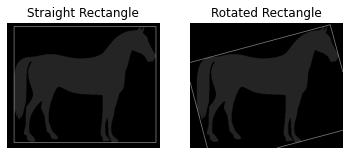

In [27]:
img1 = img_raw.copy().astype('uint8')
img2 = img_raw.copy().astype('uint8')

# Straight Rectangle

x,y,w,h = cv2.boundingRect(c0)
img1 = cv2.rectangle(img1, (x,y),(x+w,y+h),7)

# Rotated Rectangle

rect = cv2.minAreaRect(c0)
box = cv2.boxPoints(rect)
box = box.astype('int')
img2 = cv2.drawContours(img2,[box],-1,7) # blue

plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.title('Straight Rectangle')
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.title('Rotated Rectangle')
plt.show()

#### Minumum Enclosing Circle 과 Fitting Ellipse

Minumum Enclosing Circle 과 Fitting Ellipse 는 각각 컨투어 라인을 완전히 포함하는 가장 작은 원과 타원을 그리는 것이다.

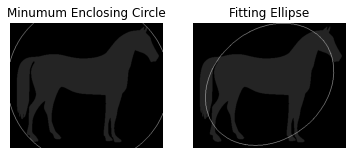

In [28]:
img3 = img_raw.copy().astype('uint8')
img4 = img_raw.copy().astype('uint8')

(x,y),radius = cv2.minEnclosingCircle(c0)
center = int(x), int(y)
radius = int(radius)
img3 = cv2.circle(img3, center, radius, 7)

ellipse = cv2.fitEllipse(c0)
img4 = cv2.ellipse(img4, ellipse, 7)


plt.subplot(1,2,1)
plt.imshow(img3, cmap='gray')
plt.axis('off')
plt.title('Minumum Enclosing Circle')
plt.subplot(1,2,2)
plt.imshow(img4,cmap='gray')
plt.axis('off')
plt.title('Fitting Ellipse')
plt.show()